In [17]:
# TODO Create a dataset:
!pip install flickrapi
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

# see the flickr demo on where to get keys. 
api_key = u'5809b37be919e1bad2d1cf665304b93e'   
api_secret = u'a2de20125afe5a6d'  
flickr = flickrapi.FlickrAPI(api_key, api_secret)

keyword = 'bicycle'
dir_name = 'bicycle'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 1300
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Save the image
        if i< 1000:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:      
          print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

keyword = 'car'
dir_name = 'car'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 1300
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Save the image
        if i< 1000:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:      
          print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

train/bicycle/bicycle_0001.jpg
train/bicycle/bicycle_0101.jpg
train/bicycle/bicycle_0201.jpg
train/bicycle/bicycle_0301.jpg
train/bicycle/bicycle_0401.jpg
train/bicycle/bicycle_0501.jpg
train/bicycle/bicycle_0601.jpg
train/bicycle/bicycle_0701.jpg
train/bicycle/bicycle_0801.jpg
train/bicycle/bicycle_0901.jpg
test/bicycle/bicycle_1001.jpg
test/bicycle/bicycle_1101.jpg
test/bicycle/bicycle_1201.jpg
train/car/car_0001.jpg
train/car/car_0101.jpg
train/car/car_0201.jpg
train/car/car_0301.jpg
train/car/car_0401.jpg
train/car/car_0501.jpg
train/car/car_0601.jpg
train/car/car_0701.jpg
train/car/car_0801.jpg
train/car/car_0901.jpg
test/car/car_1001.jpg
test/car/car_1101.jpg
test/car/car_1201.jpg


In [19]:
# TODO 1:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10595616292229685715
xla_global_id: -1
]


In [20]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# TODO 2:
import tensorflow.keras.backend as K
K.clear_session()

In [22]:
# TODO 3:  Set to smaller values if you are using a CPU.  
# Otherwise, do not change this code.
nrow = 64
ncol = 64

In [23]:
# TODO 4:  Load the VGG16 network
input_shape = (nrow,ncol,3)
base_model = applications.VGG16(weights='imagenet', input_shape=input_shape,include_top=False)

In [24]:
# Create a new model
model = Sequential()

# TODO 5:  Loop over base_model.layers and add each layer to model
for l in base_model.layers:
  model.add(l)

In [25]:
# TODO 6
for l in model.layers:
  l.trainable = False

In [26]:
# TODO 7
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [27]:
# TODO 8
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)       2

In [28]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [29]:
# TODO 9
test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow, ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 600 images belonging to 2 classes.


In [30]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

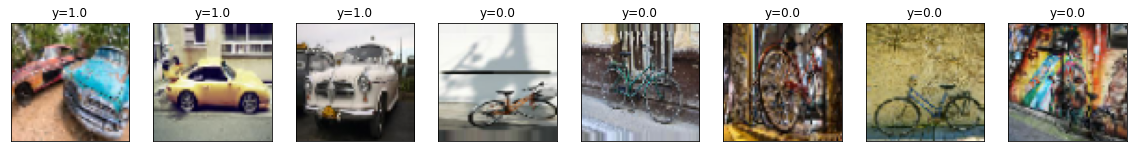

In [31]:
# TODO 10
Xtr,ytr = train_generator.next()
nsamp = 8
plt.figure(figsize=(20,10))
for i in range(nsamp):
  plt.subplot(1,nsamp,i+1)
  disp_image(Xtr[i])
  plt.title('y={}'.format(ytr[i]))

In [32]:
# TODO 11
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
# TODO 12
ntr = train_generator.n
nts = test_generator.n
steps_per_epoch =  ntr // batch_size
validation_steps =  nts // batch_size

In [34]:
nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
62/62 [==============================] - 109s 2s/step - loss: 0.7470 - accuracy: 0.8105 - val_loss: 0.2473 - val_accuracy: 0.8993
Epoch 2/5
62/62 [==============================] - 108s 2s/step - loss: 0.2571 - accuracy: 0.8989 - val_loss: 0.3333 - val_accuracy: 0.8611
Epoch 3/5
62/62 [==============================] - 108s 2s/step - loss: 0.2626 - accuracy: 0.8933 - val_loss: 0.2900 - val_accuracy: 0.8750
Epoch 4/5
62/62 [==============================] - 108s 2s/step - loss: 0.2483 - accuracy: 0.8979 - val_loss: 0.2081 - val_accuracy: 0.9167
Epoch 5/5
62/62 [==============================] - 108s 2s/step - loss: 0.2445 - accuracy: 0.9111 - val_loss: 0.2293 - val_accuracy: 0.9132


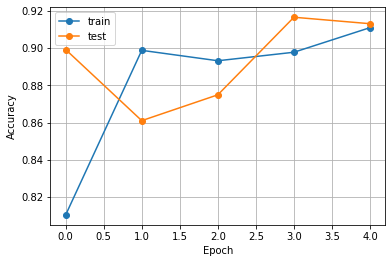

In [39]:
# Plot the training accuracy and validation accuracy curves on the same figure.

# TODO 13
plt.plot(hist.history['accuracy'], 'o-',label='train')
plt.plot(hist.history['val_accuracy'],'o-',label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

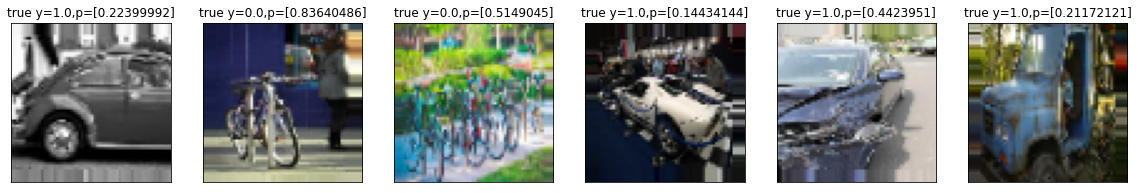

In [40]:
# TODO 14
nerr = 6
curr_n = 0
xerr = []
yerr = []
zval = []
while curr_n < nerr:
  Xts,yts = test_generator.next()
  z = model.predict(Xts)
  yhat = (z > 0.5).astype(int).ravel()
  I = np.where(yhat!=yts)[0]
  for i in I:
    xerr.append(Xts[i])
    yerr.append(yts[i])
    zval.append(z[i])
    curr_n += 1
plt.figure(figsize=(20,10))
for i in range(nerr):
  plt.subplot(1,nerr,i+1)
  disp_image(xerr[i])
  plt.title('true y={},p={}'.format(yerr[i],zval[i]))